# Part 1: *EDA, Cleaning, and Hypothesis Test*
---
This project uses data from a Boston-based bike sharing program to gain insight on the riding habits of users in different age groups. 

The process of this project involves the following steps:

- Data Collection
- Exploratory Data Analysis (EDA)
- Data Cleaning/Missingness Assessment 
- Forming and Testing Hyposthesis
- Analysis of Results 

Read the summary sections and code in the notenook below to learn more!

### Summary of Findings – 

## Cleaning and EDA:

I began by reading these files into a dataframe, where each row represents a trip, and each column contains information about the trip such the birth year of the user, start and stop times, and more. I explored the data by adding new columns for readability, modifying datatypes, and assessing significance of each column. 

As part of my cleaning and EDA, I also engineered a few new features that I thought could be useful later on in my analysis. For example I created an 'age' column by subtracting the birth year from the current year. While this age column will not be perfectly accurate because I don't know to birth month of each user, it is accurate within one year of their true age which is accurate enough for the purpose of this investigation. 

Next, I created a 'start_stop_distance' column which represents the distance between where the trip started and where it ended. It should be noted that this is not equivalent to the total distance traveled during the trip, as it is highly unlikely that riders took perfectly linear path from where the got on to where they got off.

I also added a 'day_of_week' column to contain the day of the week that each trip took place on. I used starttime as the say of week for each trip, so any trip that was started before midnight will be catagorized as a trip on that day of the week, even if it technically ended the next day. I although I didn't end up using this column, it helped me explore the data and got me thinking about possible lines of inquery.

Important to my later work, I also added new column 'age_group' which groups each entry into categories two categories, either 'middle aged' or 'young adult' depending on whether the reported age of the user is greater than 35 or not. These two categories are the groups whose trip-duration averages I will compare in the hypothesis test section. 

Next, I needed to do some cleaning of the trip_minutes column. While there are no missing values in this column, I blanked out some values that I considered unreasonable and called them "missing". These unreasonable (aka "missing") values included any entries longer than 16 hours (960 minutes) or shorter than 1.25 minutes, because these are unreasonable ride durations on a bike-share bike and were likely a mistake from the user (for example they changed their mind and didn't actually riding the bike or they forgot to end their trip). Because this data is not NMAR, it is assumed to be MAR data. In this case, I will need to use the column in question ('trip_minutes') in testing my hypothesis, so dropping observations to remove the missing values is ok. 

Finally, I cleaned up the dataframe a bit by removing any columns that I won't need to reference in the next following sections.

(See the "Code" section below in the notebook for more details.)

---
## Assessment of Missingness:

After the initial exploratory analysis, I decided to investigate the missingness mechanism of the birth year column. 
 
While there were no 'blank' entries in the dataset, both the age and birth year columns most likely did contain missing data, as they are self-reported. To begin, I looked into whether it was possible that this data is NMAR. I decided that the missingness of the age column is not NMAR, because it would not make sense for the missing age values to depend on the value of the (actual, unreported) missing values, because the reason we blanked them out is that they were unreasonable values. There could be other reasons why some users incorrectly self-reported their age, for example they could have been rushing through the sign up process and not taken it seriously and just put in random values as their age, name, etc. After concluding that this column is not NMAR, the assumption is that the data is MAR. 

The next step in assessing the missingness of the age column is to perform permutation tests to analyze the dependency of this missingness on other columns. I found that the missingness of the age column was not dependent on the usertype column, but I found that the age data was dependent on the gender column. Because this second permutation test pointed towards different distributions of missing vs. non-missing data for one of the columns, the age data cannot be MCAR, and therefore is indeed MAR. 

---
## Hypothesis Test and Results
Now that the dataset is prepared, I can perform a hypothesis test to help answer a specific question – **do middle-aged users tend to take longer or shorter rides than young adults?**

For the purpose of this project, I will define middle aged users as those aged 35+, and younger adult users are those whose age is less than 35. In my exploratory analysis, it seemed that the average trip duration could be longer for middle aged users, so I will keep this in mind when forming my alternative hypothesis. I decided to use a significance level of 0.05. 


- **Null hypothesis**: Of BlueBikes users, the average trip duration of middle aged users and young adult users are the same. (i.e. they come from the same distribution)
   
- **Alternative hypothesis**: Of BlueBikes users, trip duration of middle aged users is typically longer than that of younger users.

I decided a reasonable statistic to compute in order to test the null hypothesis is difference in means.

- **Test Statistic**: Difference between means.

After simulating under the null hypothesis, I calculated the a p-value of 1.0 which is much higher than my predetermined significance level. It is rare to see differences as large as this under the null hypothesis, therefore, we reject the null hypothesis: the two groups do not come from the same distribution.

---
## Relevence/Example Application Cases:

So why is gaining insight on users' riding habits useful? Well, example use case could be to help inform a company's marketing decisions, like whether or not a targeted marketing strategy towards a specific age group would be effective. Because if they know that different age groups tends to take longer or shorter rides, they can use that information to recruit more customers from the age group that will earn them more revenue per ride. 


## [Project Code]:

In [347]:
%matplotlib inline
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

In the below cells, I read in the data from csv files into a dataframe so that I could begin my analysis. 

In [348]:
path = 'data'
all_files = glob.glob(path + "/*.csv")
all_files

['data/201810-bluebikes-tripdata.csv',
 'data/201812-bluebikes-tripdata.csv',
 'data/201811-bluebikes-tripdata.csv',
 'data/201809-bluebikes-tripdata.csv',
 'data/201902-bluebikes-tripdata.csv',
 'data/201901-bluebikes-tripdata.csv',
 'data/201806-bluebikes-tripdata.csv',
 'data/201903-bluebikes-tripdata.csv',
 'data/201805-bluebikes-tripdata.csv',
 'data/201808-bluebikes-tripdata.csv']

In [349]:
lst = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lst.append(df)

frame = pd.concat(lst, axis=0, ignore_index=True)
df = frame

### Cleaning and EDA:
---
Now that the data is in a table, we can begin some exploratory analysis and data cleaning. 

The first thing I did was convert the 'birth year' column into a new feature containing the approximate age (in years) of each user. This will just help with readability in case we want to look at users in different age groups because we tend to think of people in groups by age, not by birth year. 

In [350]:
df['age'] = 2018 - df['birth year']
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,277,2018-10-01 00:01:57.1860,2018-10-01 00:06:34.2320,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,189,Kendall T,42.362428,-71.084955,2749,Subscriber,1996,1,22
1,949,2018-10-01 00:03:22.3100,2018-10-01 00:19:11.5050,45,Jersey St. at Boylston St.,42.344681,-71.097853,103,JFK Crossing at Harvard St. / Thorndike St.,42.346563,-71.128374,3416,Subscriber,1992,1,26
2,2729,2018-10-01 00:05:49.2200,2018-10-01 00:51:18.5400,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,3647,Customer,1969,0,49


Next, I wanted to get a feel for how long each trip was, so I added a column 'start_end_distance' which contained the distance (in kilometers) between the start station and the end station for each trip. 

In [351]:
# helper method to find distance between coordinates
# taken from comments of https://gist.github.com/rochacbruno/2883505 

def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

df['start_end_distance'] = distance(df['start station latitude'], 
                                     df['start station longitude'], 
                                     df['end station latitude'],
                                     df['start station longitude']
                                   )

In [293]:
# make a day of week column:
df['start_day'] = df['starttime'].apply(lambda string: datetime.datetime.strptime(string.split('.')[0], '%Y-%m-%d %H:%M:%S').strftime('%A'))


In [294]:
# converting 'tripduration' column from seconds to minutes for readability
df['trip_minutes'] = df['tripduration'] / 60
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,start_end_distance,start_day,trip_minutes
0,277,2018-10-01 00:01:57.1860,2018-10-01 00:06:34.2320,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,189,Kendall T,42.362428,-71.084955,2749,Subscriber,1996,1,22,0.481385,Monday,4.616667
1,949,2018-10-01 00:03:22.3100,2018-10-01 00:19:11.5050,45,Jersey St. at Boylston St.,42.344681,-71.097853,103,JFK Crossing at Harvard St. / Thorndike St.,42.346563,-71.128374,3416,Subscriber,1992,1,26,0.209352,Monday,15.816667
2,2729,2018-10-01 00:05:49.2200,2018-10-01 00:51:18.5400,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,3647,Customer,1969,0,49,0.000000,Monday,45.483333


Here, I added new column 'age_group' which labels each trip either 'middle aged' 'young adult' depending on whether the reported age of the user is greater than 35 or not. These two categories will be the groups which I will compare in the hypothesis test section. 

In [295]:
# create new column
df['age_group'] = np.where(df['age'] >= 35, 'middle aged', 'young adult')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,start_end_distance,start_day,trip_minutes,age_group
0,277,2018-10-01 00:01:57.1860,2018-10-01 00:06:34.2320,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,189,Kendall T,42.362428,-71.084955,2749,Subscriber,1996,1,22,0.481385,Monday,4.616667,young adult
1,949,2018-10-01 00:03:22.3100,2018-10-01 00:19:11.5050,45,Jersey St. at Boylston St.,42.344681,-71.097853,103,JFK Crossing at Harvard St. / Thorndike St.,42.346563,-71.128374,3416,Subscriber,1992,1,26,0.209352,Monday,15.816667,young adult
2,2729,2018-10-01 00:05:49.2200,2018-10-01 00:51:18.5400,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,3647,Customer,1969,0,49,0.000000,Monday,45.483333,middle aged
3,2604,2018-10-01 00:06:21.2920,2018-10-01 00:49:45.8760,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,3673,Customer,1969,0,49,0.000000,Monday,43.400000,middle aged
4,816,2018-10-01 00:06:46.6530,2018-10-01 00:20:22.7140,4,Tremont St at E Berkeley St,42.345392,-71.069616,190,Nashua Street at Red Auerbach Way,42.365673,-71.064263,3065,Subscriber,1998,2,20,2.255852,Monday,13.600000,young adult


Next, I will clean the trip_minutes column. 

While there are no missing values in this column, I blanked out some of the unreasonable values because they are clearly "missing." I blanked out all entries with 'duration_minutes' values longer than 16 hours (960 minutes) or shorter than 1.25 minutes because these values must have been a mistake from the user (for example they changed their mind and didn't actually riding the bike or they forgot to end their trip).

In [296]:
# just looking at how many such values there are 

len(df.loc[df['trip_minutes'] > 960])
len(df.loc[df['trip_minutes'] < 1.25])

# now blanking out data because these values are "missing"

df.loc[df['trip_minutes'] > 960, 'trip_minutes'] = np.nan
df.loc[df['trip_minutes'] < 1.25, 'trip_minutes'] = np.nan
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,start_end_distance,start_day,trip_minutes,age_group
0,277,2018-10-01 00:01:57.1860,2018-10-01 00:06:34.2320,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,189,Kendall T,42.362428,-71.084955,2749,Subscriber,1996,1,22,0.481385,Monday,4.616667,young adult
1,949,2018-10-01 00:03:22.3100,2018-10-01 00:19:11.5050,45,Jersey St. at Boylston St.,42.344681,-71.097853,103,JFK Crossing at Harvard St. / Thorndike St.,42.346563,-71.128374,3416,Subscriber,1992,1,26,0.209352,Monday,15.816667,young adult
2,2729,2018-10-01 00:05:49.2200,2018-10-01 00:51:18.5400,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,3647,Customer,1969,0,49,0.000000,Monday,45.483333,middle aged


Before we get into assessing the missingness, the last thing I want to do is clean up table by dropping unnecessary rows. Station id and latitude/longitude of each station are redundant because each station's name is unique, birthyear is redundant because we will be using age column instead, and tripduration is redundant because we have trip_minutes.

In [298]:
df = df.drop(['birth year',
              'tripduration',
              'start_day',
              'start_end_distance',
              'start station id', 
              'end station id', 
              'start station latitude', 
              'end station latitude', 
              'start station longitude',
              'end station longitude'], axis=1)

In [301]:
# Before diciding on my hypothesis, some exploratory analysis

# how many are in each group?
df.groupby('age_group')['trip_minutes'].count()

age_group
middle aged    609423
young adult    899117
Name: trip_minutes, dtype: int64

In [305]:
# what is the average druation within each group?
df.groupby('age_group')['trip_minutes'].mean()

age_group
middle aged    21.362146
young adult    14.365049
Name: trip_minutes, dtype: float64


Does the difference we see reflect a real difference in the population?
Or is it just due to random chance?


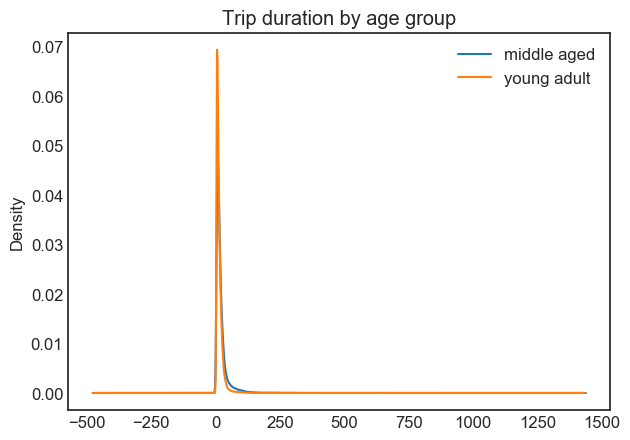

In [313]:
title='Trip duration by age group'

(
    df
    .groupby('age_group')['trip_minutes']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);   

In [318]:
observed_difference = df.groupby('age_group').mean().diff().iloc[-1,-1]
observed_difference

-6.997096347411054

### Missingness
---

Assessing the mechanism of missingness: 
Given the assumption of MAR, I will test if a data are MCAR.

A column c_test is MCAR if its missingness  𝑅  is independent of the data.

For each column c, I will check that the missingness rates of c_test are the same across values of c.
That is, the distribution of c when c_test.isull() is 'the same' as the distribution of c when c_test.notnull().

The distributions are considered 'the same' if the p-value of a permutation test is below the 0.05 significance threshold. 

In [299]:
# starting with complete dataset with all (non-redundant) columns, 
# I will blank out age values > 85, these are the "missing" values 

df.loc[df['age'] > 85, 'age'] = np.nan 

In [259]:
df.isnull().mean()

starttime             0.00000
stoptime              0.00000
start station name    0.00000
end station name      0.00000
bikeid                0.00000
usertype              0.00000
gender                0.00000
age                   0.00027
trip_minutes          0.00000
dtype: float64


First, check the data look the 'same' when age is null vs not-null
Is the empirical distribution of each column similar for null/not-null?


I will start with 'usertype' column:

In [237]:
# comparing null vs non-null (age) distributions for usertype 

distr = (
    df
    .assign(is_null=df.age.isnull())
    .pivot_table(index='is_null', columns='usertype', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

usertype,Customer,Subscriber
is_null,,
False,0.182018,0.817982
True,0.169118,0.830882


Now, I want to know if the distributions are 'similar enough'.
If yes, then missingness of age is not dependent on usertype.

I will use a permutation test to assess the two distributions are similar.

For categorical columns such as 'usertype' I use TVD as the test-statistic:

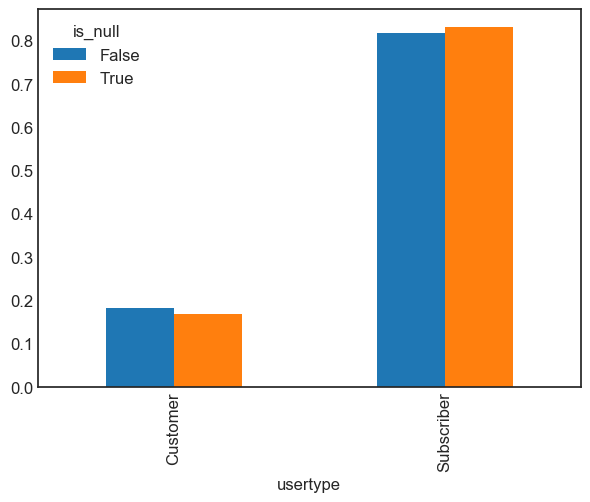

In [238]:
distr.T.plot(kind='bar');

In [239]:
n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        df['usertype']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        df
        .assign(**{
            'usertype': shuffled_col,
            'is_null': df['age'].isnull()
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='usertype', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)

In [242]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.012899875048802065

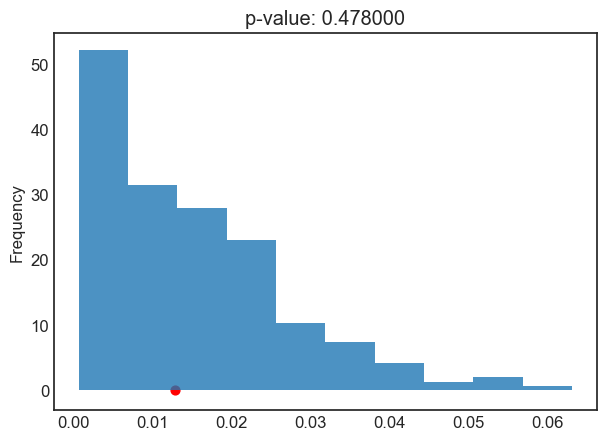

In [243]:
pval = np.mean(tvds < obs) 
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40); 

Our p-value is less than 0.05, therefore we can say that age is *not* dependent on usertype.


Now we will repeat the same process to determine whether age is dependent on gender:


In [253]:
df.head(3)

,starttime,stoptime,start station name,end station name,bikeid,usertype,gender,age,trip_minutes
0,2018-10-01 00:01:57.1860,2018-10-01 00:06:34.2320,MIT at Mass Ave / Amherst St,Kendall T,2749,Subscriber,1,22.0,4.616667
1,2018-10-01 00:03:22.3100,2018-10-01 00:19:11.5050,Jersey St. at Boylston St.,JFK Crossing at Harvard St. / Thorndike St.,3416,Subscriber,1,26.0,15.816667
2,2018-10-01 00:05:49.2200,2018-10-01 00:51:18.5400,Wentworth Institute of Technology - Huntington...,Wentworth Institute of Technology - Huntington...,3647,Customer,0,49.0,45.483333


In [254]:
# comparing null vs non-null (age) distributions for gender

distr = (
    df
    .assign(is_null=df.age.isnull())
    .pivot_table(index='is_null', columns='gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

gender,0,1,2
is_null,,,
False,0.119887,0.655895,0.224217
True,0.299020,0.617647,0.083333


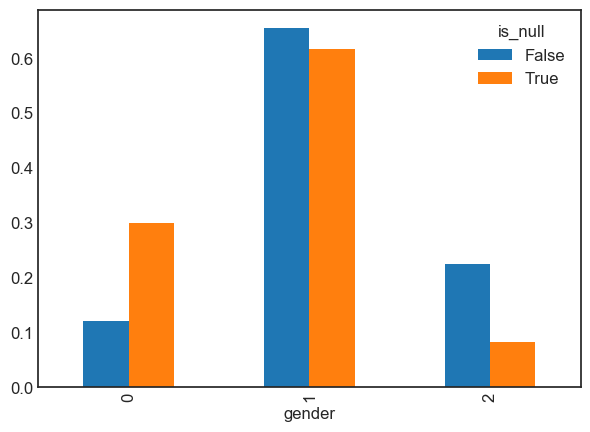

In [255]:
distr.T.plot(kind='bar');

In [256]:
n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column
    shuffled_col = (
        df['gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        df
        .assign(**{
            'gender': shuffled_col,
            'is_null': df['age'].isnull()
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='gender', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)

In [257]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.17913223390437932

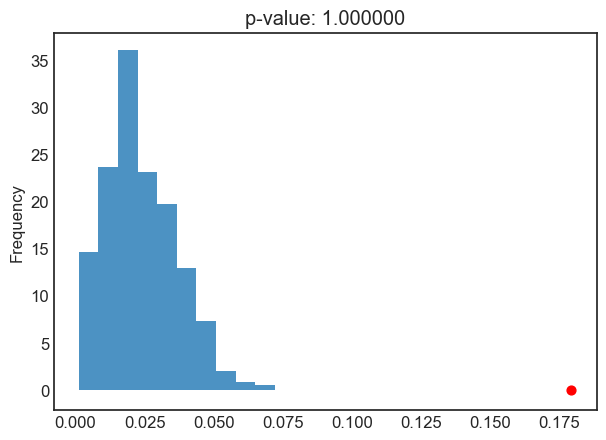

In [258]:
pval = np.mean(tvds < obs) 
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40); 

Our p-value is greater than 0.05, therefore we can say that age *is* dependent on the gender column.


### Hypothesis Test
---


I am curious as to whether middle aged users have similar . This information could be useful to the company for targeted marketing, because if they know that different age groups tends to take longer or shorter rides, they can use that information to recruit more customers from the agegroup that will earn them more revenue per ride. 
For the purpose of this project, I have decided to define middle aged users as users who are aged 35+, and younger adult users are those whose age is less than 35. In my exploratory analysis, it seemed that the average trip duration could be longer for middle aged users, so I will keep this in mind when forming my alternative hypothesis.


To help answer this question, I will formulate a hypothesis and test it. 


- **Null hypothesis**: Of BlueBikes users, the average trip duration of middle aged users and young adult users are the same. (i.e. they come from the same distribution)
   
- **Alternative hypothesis**: Of BlueBikes users, trip duration of middle aged users is typically longer than that of younger users.

I decided a reasonable statistic to compute in order to test the null hypothesis is difference in means.

- **Statistic**: Difference between means.

I will set a significance level of 0.05

In [334]:

# for this part, we only care about the 'age_group' and 'trip_minutes' columns so we can drop the others
df1 = df.loc[:, ['age_group', 'trip_minutes']]
df1.head()

,age_group,trip_minutes
0,young adult,4.616667
1,young adult,15.816667
2,middle aged,45.483333
3,middle aged,43.400000
4,young adult,13.600000


In [335]:
# Simulation:

n_repetitions = 500

differences = []
for _ in range(n_repetitions):
    
    # shuffle the weights
    shuffled_mins = (
        df1['trip_minutes']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        df1
        .assign(**{'Shuffled Trip Minutes': shuffled_mins})
    )
    
    # compute the group differences (test statistic)
    group_means = (
        shuffled
        .groupby('age_group')
        .mean()
        .loc[:, 'Shuffled Trip Minutes']
    )
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    differences.append(difference)

In [339]:
#: the group means
group_means = df1.groupby('age_group').mean()
group_means



,trip_minutes
age_group,
middle aged,21.362146
young adult,14.365049


In [343]:
#: the difference between them
observed_difference = group_means['trip_minutes'].diff().iloc[-1]
observed_difference

-6.997096347411054

### Conclusion of test:

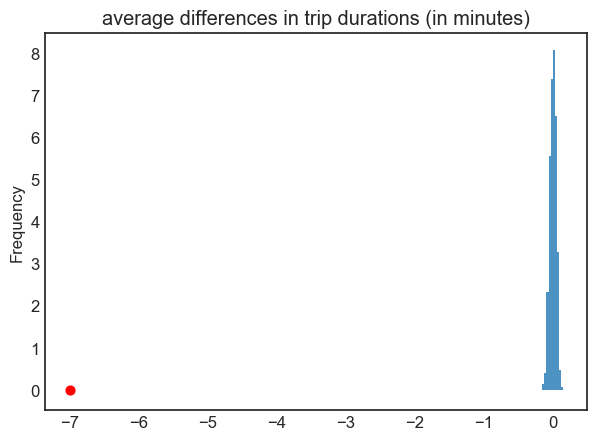

In [344]:
title = 'average differences in trip durations (in minutes)'
pd.Series(differences).plot(kind='hist', density=True, title=title,  alpha=0.8)
plt.scatter(observed_difference, 0, color='red', s=40);

The p-value = The probability of seeing a difference of means at least as extreme as the observed, under the null hypothesis.

In [346]:
#: p-value
pval = np.count_nonzero(differences >= observed_difference) / n_repetitions
pval

1.0

The p-value is much higher than our significance level. 
It is rare to see differences as large as this under the null hypothesis, therefore, we reject the null hypothesis: the two groups do *not* come from the same distribution.